In [1]:
import tensorflow as tf
from google.colab import drive
from google.colab import files
import os
import cv2
import random
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filepath=os.listdir('drive/MyDrive/LFCC')
for sub in filepath:
  print(sub)

Person 9
Person 5
Person 3
Person 1
Person 2


In [3]:
train_dir='drive/MyDrive/LFCC'
training_data=[]

In [4]:
def create_trainingdata():
    categories=os.listdir(train_dir)
    for sub in categories:
        path=os.path.join(train_dir,sub)
        class_num=categories.index(sub)
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img))
            new_array=cv2.resize(img_array,(250,250))
            training_data.append([new_array,class_num])

In [5]:
create_trainingdata()

In [6]:
random.shuffle(training_data)

In [7]:
X=[]
Y=[]
for features,label in training_data:
    X.append(features)
    Y.append(label)

X=np.array(X).reshape(-1,250,250,3)
Y=np.array(Y).reshape(-1,1)

In [8]:
x_train,x_test,y_train,y_test=train_test_split(X,Y)

In [17]:
cnn=tf.keras.Sequential([
        tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape=(250,250,3)),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
      
        tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),    
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(5, activation="softmax")
        ])

cnn.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])   

In [18]:
model1=cnn.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
89/89 [==============================] - 14s 156ms/step - loss: 3.0166 - accuracy: 0.5433 - val_loss: 0.5037 - val_accuracy: 0.7731
Epoch 2/100
89/89 [==============================] - 14s 153ms/step - loss: 0.5864 - accuracy: 0.7262 - val_loss: 0.5452 - val_accuracy: 0.7200
Epoch 3/100
89/89 [==============================] - 14s 154ms/step - loss: 0.5444 - accuracy: 0.7372 - val_loss: 0.4721 - val_accuracy: 0.7285
Epoch 4/100
89/89 [==============================] - 14s 153ms/step - loss: 0.5641 - accuracy: 0.7319 - val_loss: 0.4885 - val_accuracy: 0.7815
Epoch 5/100
89/89 [==============================] - 14s 152ms/step - loss: 0.5249 - accuracy: 0.7467 - val_loss: 0.4678 - val_accuracy: 0.7688
Epoch 6/100
89/89 [==============================] - 14s 152ms/step - loss: 0.5178 - accuracy: 0.7524 - val_loss: 0.4003 - val_accuracy: 0.8208
Epoch 7/100
89/89 [==============================] - 13s 152ms/step - loss: 0.4909 - accuracy: 0.7694 - val_loss: 0.4052 - val_accuracy:

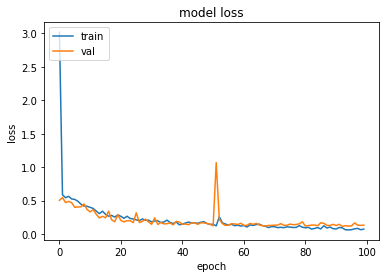

In [19]:
plt.plot(model1.history['loss'])
plt.plot(model1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [20]:
cnn.save("CNNLFCC.h5")

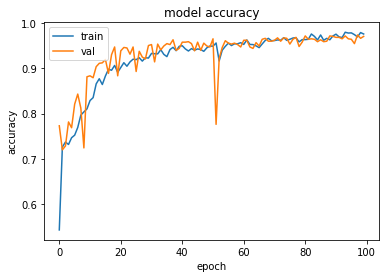

In [21]:
plt.plot(model1.history['accuracy'])
plt.plot(model1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [23]:
model_pred=cnn.predict(x_test)
model_pred=np.argmax(model_pred[:50],axis=1)
actual=y_test[:50].reshape(-1)

print("Prediction:")
print(model_pred)
print("Actual :")
print(actual)

Prediction:
[2 2 3 1 2 1 0 3 4 3 3 3 2 2 3 1 4 2 1 2 4 3 3 3 3 2 1 3 1 3 3 1 4 0 2 0 0
 0 0 2 0 1 1 2 0 3 4 1 1 4]
Actual :
[2 2 2 1 2 1 0 3 4 3 3 3 2 2 2 1 4 2 0 2 4 3 3 3 3 2 1 3 1 3 3 1 4 0 2 0 0
 0 0 2 0 1 1 2 4 3 4 1 1 4]


In [24]:
test_loss,test_acc=cnn.evaluate(x_test,y_test)

30/30 [==============================] - 2s 56ms/step - loss: 0.1336 - accuracy: 0.9703
